<a href="https://colab.research.google.com/github/rasafarova/MirKva/blob/main/HOMEEscapeS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Выбор темы
Задача проекта нашей команды заключается в прогнозировании стоимости квартир с помощью анализа и соответственно, построения регрессионных моделей. Набор данных будет состоять из основной переменной, такой как стоимость недвижимости и еще 12-ти характеристик.

Чтобы получить данные, мы использовали сайт: https://www.mirkvartir.ru/Москва/без-посредников/.

Основной критерий отбора - покупка квартиры в Москве у собственника , без посредников или агентств.

# 2. Сбор данных

**В репозиторий загружена тетрадка с парсингом данных, тут мы работаем уже с готовым датасетом**

# 3. Предварительная обработка

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn import linear_model, ensemble
import pandas as pd
import re
from time import sleep
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
!pip install folium
import folium
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/dataMirKvart.csv', sep=';')
df = df.drop(df.columns[0], axis=1)
df

,link,room,area,floor,all_floors,subway,sub_time,address,price
0,https://www.mirkvartir.ru/304161141/,2,60.0,1,4,-,-,"Москва, Первомайское поселение, д. Горчаково, ...",9100000
1,https://www.mirkvartir.ru/294901275/,3,70.0,3,26,Селигерская,7,"Москва, Дмитровское ш., 73Б",25300000
2,https://www.mirkvartir.ru/304631968/,2,46.0,4,9,Волжская,10,"Москва, ул. Полбина, 42",15100000
3,https://www.mirkvartir.ru/298724600/,1,44.0,3,22,Молодежная,10,"Москва, Истринская ул., 6",13000000
4,https://www.mirkvartir.ru/302081332/,4,176.0,24,48,Проспект Вернадского,10,"Москва, Ленинский пр-кт, 111к1",135000000
...,...,...,...,...,...,...,...,...,...
4469,https://www.mirkvartir.ru/300209065/,1,34.1,10,33,Озёрная,-,"Москва, Новочеркасский б-р, 31",8455845
4470,https://www.mirkvartir.ru/300208926/,3,72.1,28,33,Озёрная,-,"Москва, Новочеркасский б-р, 31",16204763
4471,https://www.mirkvartir.ru/300208949/,-,20.2,8,33,Озёрная,-,"Москва, Новочеркасский б-р, 31",6178695
4472,https://www.mirkvartir.ru/300208955/,2,64.4,2,17,Озёрная,-,"Москва, Новочеркасский б-р, 31",14014084


На выходе мы получили следующие переменные:

- Link - ссылка на конкретное объявление о продаже квартиры
- Name - наименование в объявлении (кол-во комнат, метраж, этаж)
позднее такую переменную убрали и разделили наименование на 3 признака для дальнейшего исследования.

- room - количество комнат в квартире

- area (m^2) - метраж конкретной квартиры

- floor - этаж

- subway - станции метро ,в районе которых располагается квартира

- sub_time - расстояние от квартиры до метро

- address - адрес

- price - стоимость квартиры-

In [ ]:
df.replace('-', np.nan, inplace=True)
df


,link,room,area,floor,all_floors,subway,sub_time,address,price
0,https://www.mirkvartir.ru/304161141/,2,60.0,1,4,NaN,NaN,"Москва, Первомайское поселение, д. Горчаково, ...",9100000
1,https://www.mirkvartir.ru/294901275/,3,70.0,3,26,Селигерская,7,"Москва, Дмитровское ш., 73Б",25300000
2,https://www.mirkvartir.ru/304631968/,2,46.0,4,9,Волжская,10,"Москва, ул. Полбина, 42",15100000
3,https://www.mirkvartir.ru/298724600/,1,44.0,3,22,Молодежная,10,"Москва, Истринская ул., 6",13000000
4,https://www.mirkvartir.ru/302081332/,4,176.0,24,48,Проспект Вернадского,10,"Москва, Ленинский пр-кт, 111к1",135000000
...,...,...,...,...,...,...,...,...,...
4469,https://www.mirkvartir.ru/300209065/,1,34.1,10,33,Озёрная,NaN,"Москва, Новочеркасский б-р, 31",8455845
4470,https://www.mirkvartir.ru/300208926/,3,72.1,28,33,Озёрная,NaN,"Москва, Новочеркасский б-р, 31",16204763
4471,https://www.mirkvartir.ru/300208949/,NaN,20.2,8,33,Озёрная,NaN,"Москва, Новочеркасский б-р, 31",6178695
4472,https://www.mirkvartir.ru/300208955/,2,64.4,2,17,Озёрная,NaN,"Москва, Новочеркасский б-р, 31",14014084


In [ ]:
print(df.dtypes)

link           object
room           object
area          float64
floor          object
all_floors     object
subway         object
sub_time       object
address        object
price           int64
dtype: object


In [ ]:
df.isnull().sum()

link             0
room           180
area             0
floor           44
all_floors      44
subway         112
sub_time      1112
address          0
price            0
dtype: int64

In [ ]:
df.shape

(4474, 9)

Cейчас таблица содержит 4474 строк (объектов) и 9 столбцов (признаков), проверим сколько уникальных значений


In [ ]:
df.nunique()

link          2960
room            36
area           899
floor           42
all_floors      57
subway         159
sub_time        20
address       2498
price          783
dtype: int64

у нас много строк с повторными ссылками, уберем их

In [ ]:
df = df.drop_duplicates(subset='link')

Итак, таблица содержит 2960 строк (объектов) и 9 столбцов (признаков), включая выходной (целевой) признак и еще один с ссылкой на квартиру.
Проверим по остальным признакам, сколько значений NaN и уберем их

In [ ]:
df.isnull().sum()

link            0
room          120
area            0
floor          33
all_floors     33
subway         73
sub_time      761
address         0
price           0
dtype: int64

In [ ]:
df.dropna(subset=['room', 'subway', 'floor', 'all_floors', 'sub_time'], inplace=True)

<ipython-input-273-f1ce96d6540f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['room', 'subway', 'floor', 'all_floors', 'sub_time'], inplace=True)


In [ ]:
df['room'] = df['room'].astype(int)
df['floor'] = df['floor'].astype(int)
df['all_floors'] = df['all_floors'].astype(int)
df['sub_time'] = df['sub_time'].astype(int)

<ipython-input-274-155f86ac1ea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room'] = df['room'].astype(int)
<ipython-input-274-155f86ac1ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'] = df['floor'].astype(int)
<ipython-input-274-155f86ac1ea0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
mean_X = df['sub_time'].mean().round(2)
df['sub_time'] = df['sub_time'].fillna(mean_X) # замена на среднее
df = df.sort_values('price') # сортировка по возрастанию

<ipython-input-275-71ec7b567682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub_time'] = df['sub_time'].fillna(mean_X) # замена на среднее


In [ ]:
df.shape

(2105, 9)

# 4.Создание новых признаков

**Создадим столбец с данными о лифте, лифт должен быть во всех зданиях выше 5 этажа**

In [ ]:
df['elevator'] = df['floor'].apply(lambda x: '1' if x > 5 else '0')
df.head()

,link,room,area,floor,all_floors,subway,sub_time,address,price,elevator
411,https://www.mirkvartir.ru/301434620/,1,10.5,2,4,Измайловская,15,"Москва, Сиреневый б-р, 15а",3300000,0
495,https://www.mirkvartir.ru/302479639/,1,10.3,1,5,Зорге,10,"Москва, ул. Маршала Конева, 29",4198000,0
3737,https://www.mirkvartir.ru/293246812/,1,16.0,4,5,Шоссе Энтузиастов,14,"Москва, ул. Энтузиастов 2-я, 5к39",4350000,0
1668,https://www.mirkvartir.ru/301115981/,1,16.7,1,5,Спартак,15,"Москва, Волоколамское ш., 116стр17",4500000,0
3820,https://www.mirkvartir.ru/301119300/,1,24.0,6,6,Первомайская,16,"Москва, Первомайская ул., 126",4599000,1


Чтобы проверить некоторые гипотезы, мы решили обогатить наш датасет. А именно добавить широту и долготу станций метро Москвы, где располагаются продаваемые собственниками квартиры. Необходимые нам координаты были получены с помощью

1) https://yandex.ru/maps/213/moscow/?ll=37.262810%2C55.618702&z=14

2) https://www.ruscript.net/scripts/275/

Также для большей наглядности мы добавили тепловую карту. На ней можно увидеть районы продажи квартир.

**Добавим новые признаки с широтой и долготой**

In [ ]:
df_cords = pd.read_excel('/content/Книга2 (5).xlsx')
df_cords

,subway,latitude,longitude
0,Авиамоторная,55.751432,37.716621
1,Автозаводская,55.706634,37.657008
2,Академическая,55.687660,37.573339
3,Алексеевская,55.807800,37.638737
4,Алтуфьево,55.898376,37.587344
...,...,...,...
147,Октябрьское поле,55.793615,37.493496
148,Братиславская,55.66126,37.7509
149,Чкаловская,55.758640,37.659155
150,Бауманская,55.77228,37.67857


In [ ]:
data = df.merge(df_cords, on='subway', how='left')

In [ ]:
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].str.lstrip('\ufeff').astype(float)

In [ ]:
import math

# Координаты центра Москвы (например, Кремль)
center_latitude = 55.752
center_longitude = 37.617

# Функция для вычисления расстояния от центра Москвы
def calculate_distance(lat, lon):
    earth_radius = 6371  # Радиус Земли в километрах

    # Преобразование координат в радианы
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    center_lat_rad = math.radians(center_latitude)
    center_lon_rad = math.radians(center_longitude)

    # Разница между широтами и долготами
    dlat = center_lat_rad - lat_rad
    dlon = center_lon_rad - lon_rad

    # Вычисление расстояния по формуле гаверсинуса
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(lat_rad) * math.cos(center_lat_rad) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = earth_radius * c

    return distance

# Преобразование столбцов "latitude" и "longitude" в числовой формат
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

# Добавление нового столбца "Отдаленность от центра"
data['Center_distance'] = data.apply(lambda row: calculate_distance(row['latitude'], row['longitude']), axis=1)

**Добавим новый признак "Средняя стоимость квартиры за квадратный метр"**

In [ ]:
data['price_per_sqm'] = data['price'] / data['area']
mean_price_per_sqm = data['price_per_sqm'].mean()
print('Средняя стоимость квартиры за квадратный метр:', mean_price_per_sqm)

Средняя стоимость квартиры за квадратный метр: 350174.75453885924


In [ ]:
data.isnull().sum()
data = data.dropna()

# 5-6. Визуализация и гипотезы

In [ ]:
data.describe()

,room,area,floor,all_floors,sub_time,price,latitude,longitude,Center_distance,price_per_sqm
count,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2.102000e+03
mean,2.381541,67.352935,7.944339,14.740247,13.752617,2.566851e+07,55.738198,37.598101,10.364395,3.503641e+05
std,0.930217,33.081512,6.178315,8.226511,4.741854,3.867858e+07,0.078118,0.120941,5.389772,1.774244e+05
min,1.000000,10.300000,1.000000,2.000000,1.000000,3.300000e+06,55.537964,37.334756,0.093373,1.275000e+05
25%,2.000000,46.000000,3.000000,9.000000,11.000000,1.400000e+07,55.684539,37.505831,6.266909,2.584389e+05
50%,2.000000,58.800000,6.000000,14.000000,15.000000,1.650000e+07,55.741004,37.596192,10.233037,3.101418e+05
75%,3.000000,77.000000,11.000000,18.000000,18.000000,2.749750e+07,55.793615,37.663719,13.546139,3.900849e+05
max,6.000000,397.000000,61.000000,79.000000,20.000000,1.000000e+09,55.933990,37.928039,24.630407,3.900000e+06


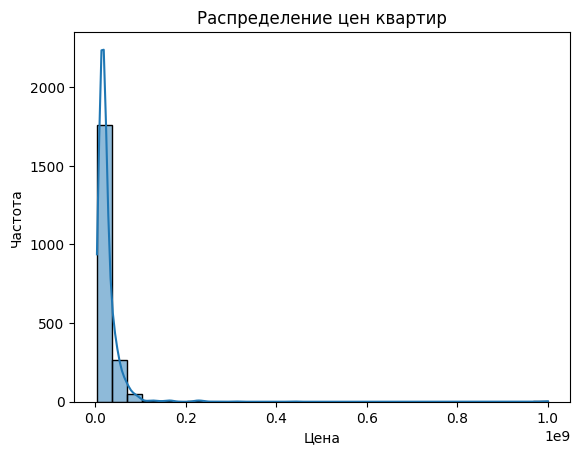

In [ ]:
prices = data['price'].values

sns.histplot(prices, bins=30, kde=True)

plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен квартир')

plt.show()

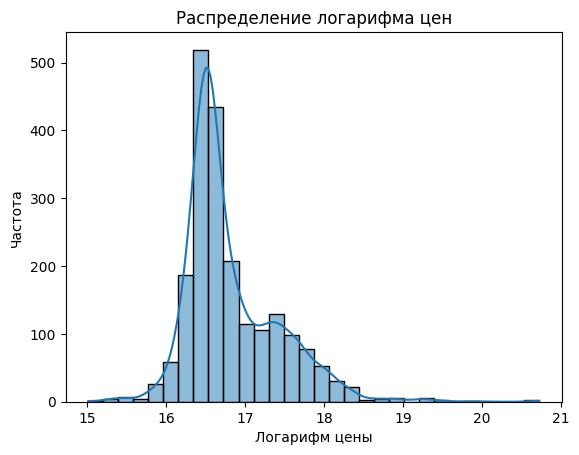

In [ ]:
prices = data['price'].values
log_prices = np.log(prices)

sns.histplot(log_prices, bins=30, kde=True)

plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.title('Распределение логарифма цен')

plt.show()

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium.plugins import HeatMap

# Определение границ для Москвы и Московской области
min_latitude = 54.52
max_latitude = 56.01
min_longitude = 36.8
max_longitude = 38.28

# Ограничение данных по границам
filtered_df = data[(data['latitude'].astype(float) >= min_latitude) &
                 (data['latitude'].astype(float) <= max_latitude) &
                 (data['longitude'].astype(float) >= min_longitude) &
                 (data['longitude'].astype(float) <= max_longitude)]

# Создание базовой карты
map = folium.Map(location=[55.75, 37.61], zoom_start=10)

# Создание тепловой карты
heat_data = filtered_df[['latitude', 'longitude', 'price']].values.astype(float)
HeatMap(heat_data).add_to(map)

# Отображение карты
map

Наши предположения:
- Квартиры с большей площадью имеют более высокую стоимость.
- Чем ближе квартира расположена к центру Москвы, тем выше ее стоимость.
- Квартиры на высоких этажах дороже, чем на низких.
- Квартиры с большим количеством комнат имеют более высокую стоимость.
- Квартиры на первом этаже дешевле, чем на остальных этажах.
- Квартиры в районах с развитой инфраструктурой (школы, магазины, транспортная доступность) имеют более высокую стоимость.
- Квартиры в домах с лифтом дороже, чем в домах без лифта.

Влияние близости к метро на цену квартиры.

Создайте scatter plot, где по оси x будет отдаленность от центра (столбец "Отдаленность от центра"), а по оси y - цена (столбец "price"). Разделите точки на цветовые группы в зависимости от наличия метро (столбец "sub_time"). Если наблюдается различие в ценах между квартирами с метро и без метро, то можно предположить, что близость к метро влияет на цену квартиры.

<ipython-input-291-88dda442f59a>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Время до метро')


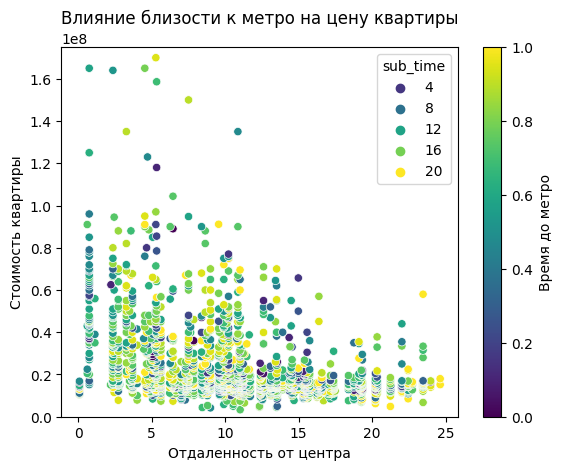

In [ ]:
# Создание scatter plot
sns.scatterplot(data=data, x='Center_distance', y='price', hue='sub_time', palette='viridis')
plt.xlabel('Отдаленность от центра')
plt.ylabel('Стоимость квартиры')
plt.title('Влияние близости к метро на цену квартиры')
plt.ylim(0, 175000000)

# Создание цветовой шкалы (colorbar)
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Пустой массив, чтобы предотвратить ошибку
plt.colorbar(sm, label='Время до метро')

plt.show()

 Для подтверждения или опровержения гипотезы о зависимости стоимости квартиры от ее расположения можно использовать hexbin plot с координатами широты и долготы квартиры и ее стоимости. Если гипотеза верна, то на графике будет наблюдаться положительная корреляция между стоимостью квартиры и ее удаленностью от центра Москвы

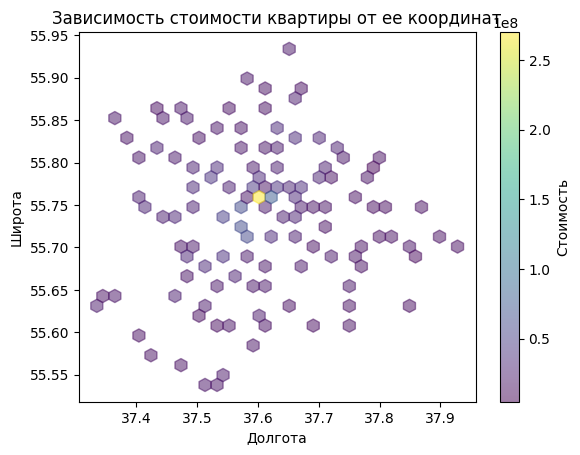

In [ ]:
plt.hexbin(data['longitude'], data['latitude'], C=data['price'], gridsize=30, cmap='viridis', alpha=0.5)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Зависимость стоимости квартиры от ее координат')
plt.colorbar(label='Стоимость')
plt.show()

**Гипотеза подтвердилась.**

Для проверки гипотезы о зависимости стоимости квартиры от количества комнат можно использовать bar plot, который покажет среднюю стоимость квадратного метра в квартирах с разным количеством комнат. Если гипотеза верна, то на графике будет наблюдаться положительная корреляция между стоимостью квадратного метра и количеством комнат.

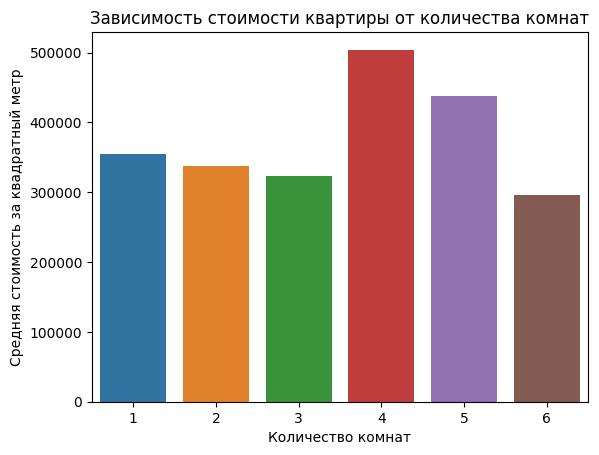

In [ ]:
mean_price = data.groupby('room')['price_per_sqm'].mean().reset_index()

# Создание столбчатой диаграммы
sns.barplot(data=mean_price, x='room', y='price_per_sqm')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость за квадратный метр')
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.show()

Для проверки гипотезы о зависимости стоимости квартиры от ее метража. scatter plot, где каждая точка представляет собой квартиру, а ее площадь будет отображаться по оси x, а стоимость - по оси y. Если на графике будет наблюдаться явная положительная или отрицательная корреляция между площадью и стоимостью, то это может подтвердить гипотезу о влиянии метража на стоимость квартиры.

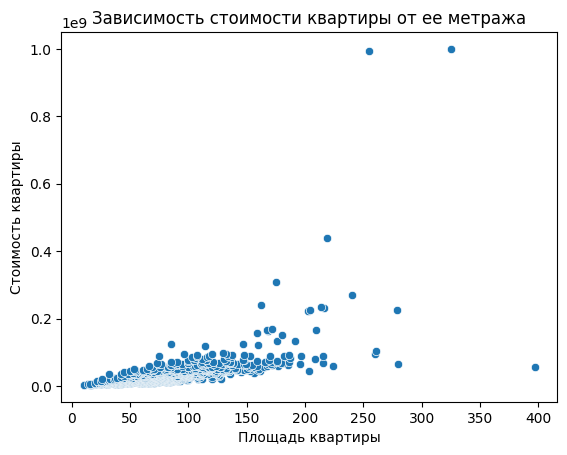

In [ ]:
sns.scatterplot(data=data, x='area', y='price')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости квартиры от ее метража')

plt.show()

**Гипотеза подтвердилась.**

**Да площадь квартиры, влияет на ее стоимость**

In [ ]:
# Разделение данных на две выборки по площади
#69 - средняя площадь по всей выборке
sample1 = data[data['area'] < 69]['price']
sample2 = data[data['area'] >= 69]['price']

# Проведение t-теста
stat, p = ttest_ind(sample1, sample2)

# Вывод результатов
print('t-статистика:', stat)
print('p-value:', p)
if p > 0.05:
    print('Нулевая гипотеза не может быть отвергнута')
else:
    print('Нулевая гипотеза отвергнута, есть статистически значимая разница в ценах на квартиры в зависимости от их площади')

t-статистика: -16.612612324314497
p-value: 2.5249749848983012e-58
Нулевая гипотеза отвергнута, есть статистически значимая разница в ценах на квартиры в зависимости от их площади


Для проверки гипотезы о зависимости стоимости квартиры от этажа можно использовать box plot, который покажет разброс стоимости квартир на разных этажах. Если гипотеза верна, то медиана стоимости квартир на высоких этажах будет выше, чем на низких.

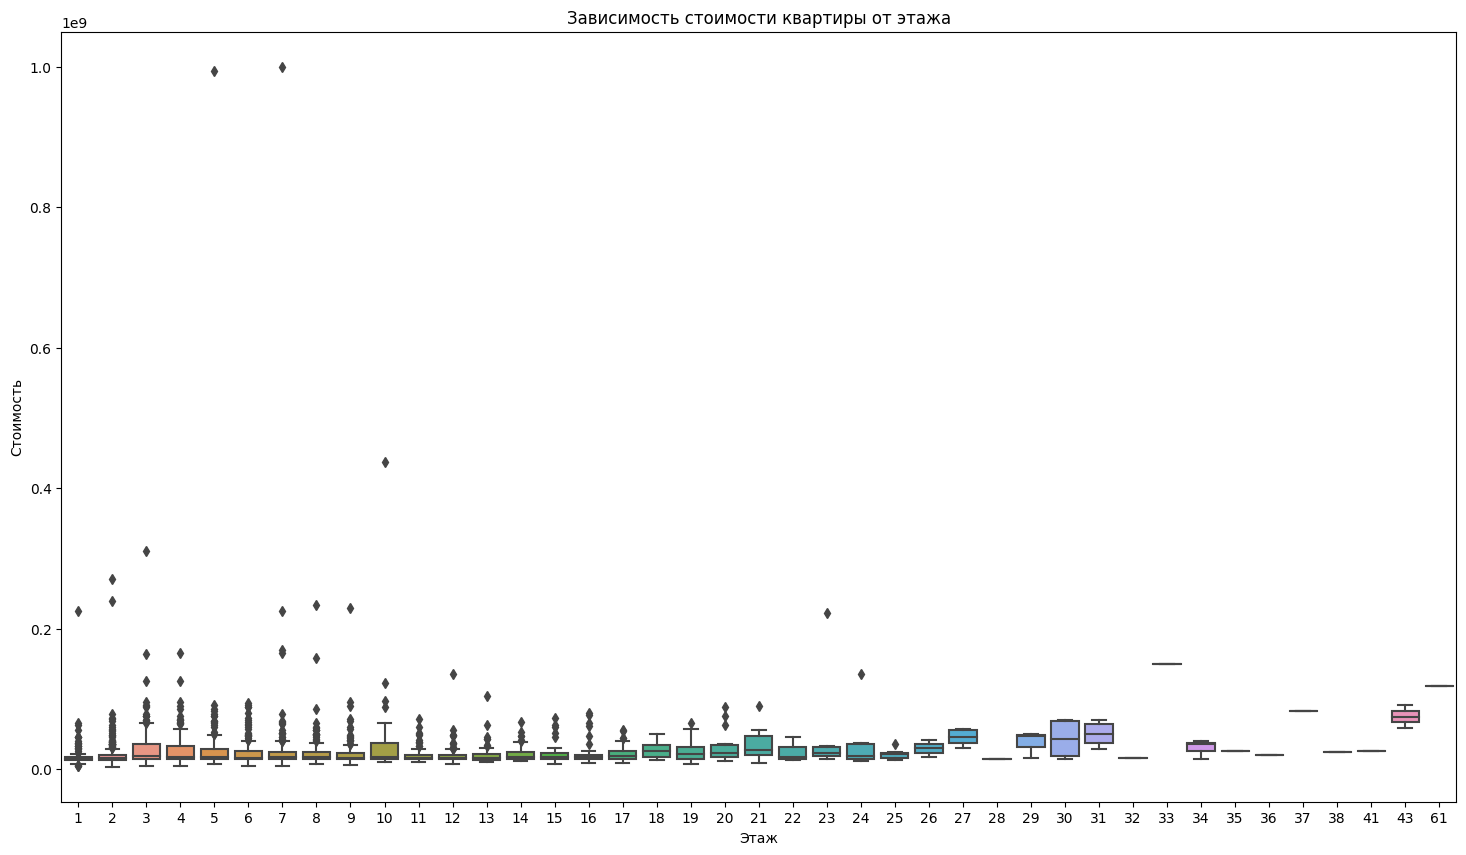

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='floor', y='price', data=data)
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости квартиры от этажа')
plt.show()

**Вывод:** Наше предположение не подтвердилось.

Для проверки гипотезы о зависимости стоимости квартиры от наличия лифта можно использовать box plot, который покажет разброс стоимости квартир в домах с лифтом и без лифта. Если гипотеза верна, то медиана стоимости квартир в домах с лифтом будет выше, чем в домах без лифта.


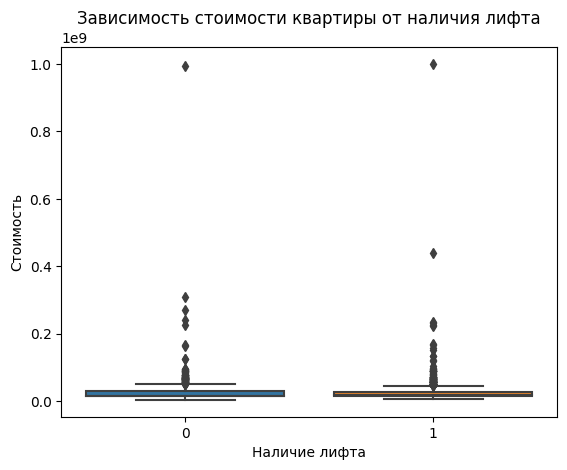

In [ ]:
sns.boxplot(x='elevator', y='price', data=data)
plt.xlabel('Наличие лифта')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости квартиры от наличия лифта')
plt.show()


Дополнительно можно использовать ящик с усами (boxplot) для визуализации зависимости цены квартиры от близости к метро. Boxplot позволяет наглядно сравнить распределение цен для квартир с метро и без метро.

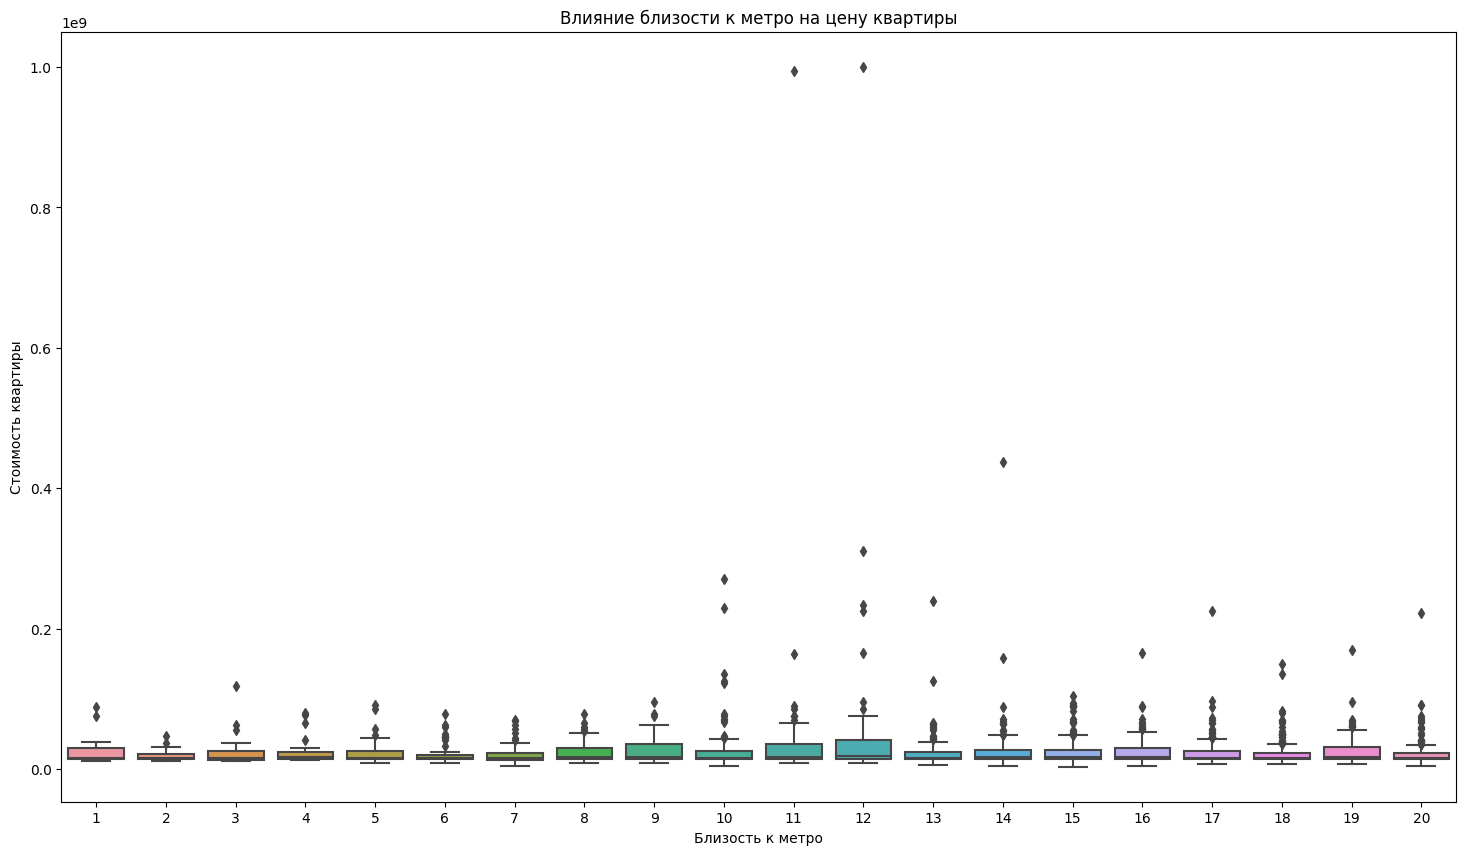

In [ ]:
plt.figure(figsize=(18, 10))
# Создание ящика с усами
sns.boxplot(x='sub_time', y='price', data=data)
plt.xlabel('Близость к метро')
plt.ylabel('Стоимость квартиры')
plt.title('Влияние близости к метро на цену квартиры')

plt.show()

Схлопывание значений может быть связано с недостаточным объемом выборки или слишком большим разбросом данных. Последнее означает, что значения в выборке сильно отличаются друг от друга. Это может привести к тому, что при анализе данных некоторые значения будут считаться выбросами и исключаться из расчетов, что может привести к схлопыванию значений.



Также у нас появилось предположение о том, что квартиры, которые находятся в пятиэтажных зданиях и ниже + находятся ближе к москве стоят дороже.
Проверим.

посмотрим сколько у нас всего значений по этажам и сколько у нас квартир с этажом ниже 10.

In [ ]:
floors_below_5_count = data[data['all_floors'] < 10]['all_floors'].value_counts().sum()

print("Количество квартир с этажом ниже 10:")
print(floors_below_5_count)

Количество квартир с этажом ниже 10:
737


In [ ]:
total_floors_count = data['all_floors'].value_counts().sum()

print("Количество значений по этажам:")
print(total_floors_count)

Количество значений по этажам:
2102


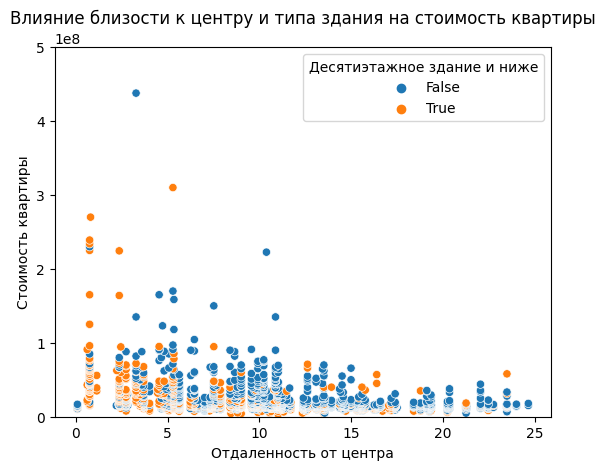

In [ ]:
data['Is_Five_Floors'] = data['all_floors'] <= 10
sns.scatterplot(x='Center_distance', y='price', hue='Is_Five_Floors', data=data)
plt.xlabel('Отдаленность от центра')
plt.ylabel('Стоимость квартиры')
plt.title('Влияние близости к центру и типа здания на стоимость квартиры')
plt.legend(title='Десятиэтажное здание и ниже')
plt.ylim(0, 500000000)

plt.show()

In [ ]:
df_below_10 = data[data['floor'] < 10]['price']
df_above_10 = data[data['floor'] >= 10]['price']

In [ ]:
stat, p = shapiro(df_below_10)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Распределение похоже на нормальное')
else:
    print('Распределение не похоже на нормальное')

stat=0.247, p=0.000
Распределение не похоже на нормальное


In [ ]:
stat, p = shapiro(df_above_10)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Распределение похоже на нормальное')
else:
    print('Распределение не похоже на нормальное')

stat=0.469, p=0.000
Распределение не похоже на нормальное


Результаты теста Шапиро-Уилка для обеих выборок показывают, что данные не распределены нормально (p-value < 0.05). Поэтому мы будем использовать непараметрический тест Манна-Уитни для проверки гипотезы о равенстве средних значений двух выборок:

In [ ]:
stat, p = sts.mannwhitneyu(df_below_10, df_above_10)
print('Mann-Whitney U test:', p)

Mann-Whitney U test: 0.004169504800930049


Результат теста Манна-Уитни показывает, что различия между средними значениями цен на квартиры на этажах ниже и выше 10 являются статистически значимыми (p-value < 0.05). Гипотеза о равенстве медиан отвергается в пользу альтернативной гипотезы о том, что медианы выборок различны

In [ ]:
# Рассчитываем коэффициент корреляции Пирсона и p-value
correlation, p_value = pearsonr(data['sub_time'], data['Center_distance'])

# Выводим результаты
print("Коэффициент корреляции Пирсона:", correlation)
print("p-value:", p_value)

Коэффициент корреляции Пирсона: -0.006439749271858257
p-value: 0.7679371105072273


In [ ]:
# Извлекаем значений переменных
sub_time_values = data['sub_time'].values
center_distance_values = data['Center_distance'].values

# Расчитываем коэффициента корреляции Спирмена и p-value
correlation, p_value = spearmanr(sub_time_values, center_distance_values)

print("Коэффициент корреляции Спирмена:", correlation)
print("p-value:", p_value)

Коэффициент корреляции Спирмена: -0.004965867403276042
p-value: 0.8200046887217454


На основе этих результатов можно сделать вывод, что между близостью к метро и отдаленностью от центра города нет линейной зависимости. Коэффициент Пирсона и Спирмена близок к нулю, что говорит о том, что нет линейной связи между этими переменными. Однако, p-value для обоих коэффициентов выше уровня значимости 0.05, что означает, что мы не можем отвергнуть нулевую гипотезу о том, что нет связи между этими переменными.

# 7. Машинное обучение

Подготовим наш датасет для обучения

In [ ]:
selected_columns = ['room', 'area', 'floor', 'all_floors', 'sub_time', 'price', 'elevator', 'price_per_sqm', 'latitude', 'longitude', 'Center_distance']
df = data[selected_columns]


Мы выбираем два различных метода для построения моделей и проведения сравнительного анализа результатов:

1.Линейная регрессия (Linear Regression): Это простой и широко используемый метод, который ищет линейную зависимость между входными переменными и целевой переменной. Он предполагает, что целевая переменная может быть предсказана с помощью линейной комбинации входных переменных. Линейная регрессия может быть полезна, когда есть явная линейная связь между признаками и целевой переменной или когда размер выборки относительно небольшой.

2.Лес решающих деревьев (Random Forest): Это ансамблевый метод, который комбинирует множество решающих деревьев для получения более точных прогнозов. Он основан на идее построения множества деревьев и объединения их предсказаний. Лес решающих деревьев может быть эффективным, когда данные содержат нелинейные зависимости или взаимодействия между признаками.

Разделим наш датасет на обучающую и тестовую выборку

In [ ]:
X = df.drop('price', axis=1)  # все столбцы, кроме 'price'
y = df['price']  # Целевая переменная ('price')

# Разделяем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: обучающие признаки
# y_train: обучающая целевая переменная
# X_test: тестовые признаки
# y_test: тестовая целевая переменная


Создадим модель линеной регрессии

In [ ]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

теперь для случайного леса

In [ ]:
rand_forest_model = ensemble.RandomForestRegressor()

Метод случайного леса имеет больше параметров, которые могут быть настроены для достижения лучшей производительности модели. Некоторые из наиболее важных параметров в методе случайного леса включают:

* Параметр n_estimators: Он определяет количество деревьев в лесу. Увеличение значения этого параметра может привести к более точным прогнозам, но также увеличивает время обучения модели.

* Параметр max_depth: Он устанавливает максимальную глубину дерева в лесу. Увеличение этого значения позволяет модели учитывать более сложные зависимости в данных, но также может привести к переобучению модели.

* Параметр min_samples_leaf: Он задает минимальное количество объектов, которые должны попасть в лист дерева. Увеличение этого значения может помочь уменьшить переобучение модели и улучшить ее обобщающую способность.

Каждый из этих параметров имеет свое значение и может быть настроен в зависимости от специфических требований задачи и характеристик данных. Экспериментирование с различными значениями параметров позволяет найти оптимальную комбинацию, которая обеспечивает лучшую производительность модели.

**Обучим модель**

In [ ]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor()

**Получим прогнозы**

In [ ]:
test_predict_linear = linear_regression_model.predict(X_test)

In [ ]:
test_predict_rand_forest = rand_forest_model.predict(X_test)

Теперь перейдем к визуализации модели линейной регрсии и настоящего значения тестовой выборки

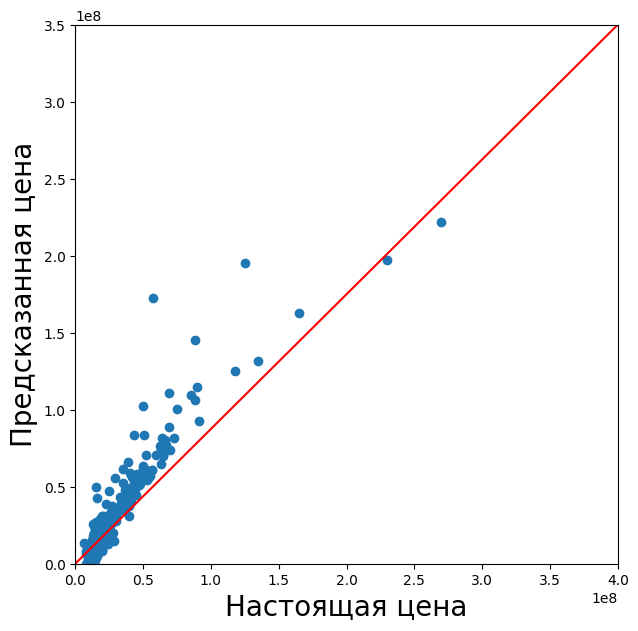

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predict_linear)
plt.plot([0, 4 * 10**8], [0, 3.5 * 10**8], 'r')  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.xlim(0, 4 * 10**8)  # пределы для оси x
plt.ylim(0, 3.5 * 10**8)  # пределы для оси y
plt.show()

Визуализация модели случайного леса

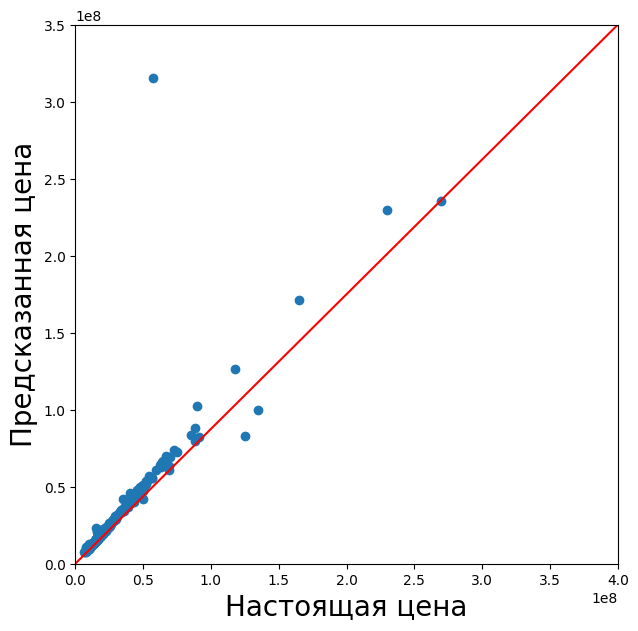

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predict_rand_forest)
plt.plot([0, 4 * 10**8], [0, 3.5 * 10**8], 'r')
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.xlim(0, 4 * 10**8)
plt.ylim(0, 3.5 * 10**8)
plt.show()

Как будто лучше сработала модель случайного леса

Проверим действительно ли это так.

Для оценки качества регрессионной модели и вычисления метрик **mean_absolute_error** (средняя абсолютная ошибка) и **mean_squared_error** (средняя квадратичная ошибка) можно воспользоваться функциями из библиотеки sklearn.metrics

In [ ]:
mean_absolute_linear_model = mean_absolute_error(y_test, test_predict_linear)
mean_squared_linear_model = mean_squared_error(y_test, test_predict_linear)

In [ ]:
mean_absolute_rand_forest_model = mean_absolute_error(y_test, test_predict_rand_forest)
mean_squared_rand_forest_model = mean_squared_error(y_test, test_predict_rand_forest)

In [ ]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_linear_model,
        np.sqrt(mean_squared_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_rand_forest_model,
       mean_squared_rand_forest_model**(1/2)))

MAE: 8080232.57, RMSE: 21096844.15 для модели линейной регрессии
MAE: 3077034.88, RMSE: 29323905.00 для модели случайного леса


Да, модель случайного леса работает лучше.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 8080232.572106602
Mean Squared Error: 445076832948913.56
R-squared: 0.8621519024130099


Полученные значения метрик качества модели указывают на следующее:

1. Mean Absolute Error (MAE): 8,080,232.57
MAE представляет собой среднюю абсолютную ошибку предсказания модели. Значение MAE указывает на среднюю разницу между фактическими значениями цены и предсказанными значениями. В данном случае, средняя абсолютная ошибка составляет около 8,080,232 рублей. Чем ближе значение MAE к нулю, тем лучше модель.

2. Mean Squared Error (MSE): 445,076,832,948,913.56
MSE измеряет среднее квадратичное отклонение предсказанных значений от фактических значений. Значение MSE составляет около 45,076,832,948,913 рублей в квадрате. MSE штрафует большие отклонения сильнее, чем MAE.

3. R-squared: 0.862
Коэффициент детерминации (R-squared) показывает, насколько хорошо модель объясняет вариацию целевой переменной. Значение R-squared около 0.862 означает, что примерно 86% вариации цены объясняется моделью. Чем ближе значение R-squared к 1, тем лучше соответствие модели данным.

Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

# Сетка гиперпараметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'alpha': [0.9, 0.95, 0.99]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Прогнозирование на тестовых данных
y_pred = best_model.predict(X_test)

# Оценка метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 2868698.4705874203
Mean Squared Error: 733995503789233.5
R-squared: 0.7726687251628669


Значения метрик качества модели немного улучшились:

1. Средняя абсолютная ошибка (Mean Absolute Error) уменьшилась до 2,868,698.47
2. Средняя квадратичная ошибка (Mean Squared Error) уменьшилась до 6,733,995,503,789,233.5
3. Коэффициент детерминации (R-squared) уменьшился до 0.7726